<a href="https://colab.research.google.com/github/SelenaNahra/MachineLearning/blob/main/ML_Final_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Import the data set
data = pd.read_csv("Project DataSet.csv")
print(data.head(10))

   HeartDiseaseorAttack  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                     0       1         1          1   40       1       0   
1                     0       0         0          0   25       1       0   
2                     0       1         1          1   28       0       0   
3                     0       1         0          1   27       0       0   
4                     0       1         1          1   24       0       0   
5                     0       1         1          1   25       1       0   
6                     0       1         0          1   30       1       0   
7                     0       1         1          1   25       1       0   
8                     1       1         1          1   30       1       0   
9                     0       0         0          1   24       0       0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0         0             0       0  ...              1            0       

In [ ]:
print(data.columns)
print(data.head(10))

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'Diabetes', 'Fruits', 'Veggies', 'HvyAlcoholConsump'],
      dtype='object')
   HeartDiseaseorAttack  HighBP  HighChol  BMI  Smoker  Stroke  Diabetes  \
0                     0       1         1    1       1       0         0   
1                     0       0         0    0       1       0         0   
2                     0       1         1    0       0       0         0   
3                     0       1         0    0       0       0         0   
4                     0       1         1    0       0       0         0   
5                     0       1         1    0       1       0         0   
6                     0       1         0    1       1       0         0   
7                     0       1         1    0       1       0         0   
8                     1       1         1    1       1       0         1   
9                     0       0         0    0       0       0         0   


In [ ]:
column_to_modify1 = 'BMI'

# Change BMI: 1 = Obseity, 0 = Not Obese
data[column_to_modify1] = data[column_to_modify1].apply(lambda x: 1 if x >= 30 else 0)

column_to_modify2 = 'Diabetes'

# Change Diabetes: 1 = Type 1 or Type 2, 0 = Not Diabetic
data[column_to_modify2] = data[column_to_modify2].apply(lambda x: 1 if x >= 1 else 0)

print(data.head(10))

   HeartDiseaseorAttack  HighBP  HighChol  BMI  Smoker  Stroke  Diabetes  \
0                     0       1         1    0       1       0         0   
1                     0       0         0    0       1       0         0   
2                     0       1         1    0       0       0         0   
3                     0       1         0    0       0       0         0   
4                     0       1         1    0       0       0         0   
5                     0       1         1    0       1       0         0   
6                     0       1         0    0       1       0         0   
7                     0       1         1    0       1       0         0   
8                     1       1         1    0       1       0         1   
9                     0       0         0    0       0       0         0   

   Fruits  Veggies  HvyAlcoholConsump  
0       0        1                  0  
1       0        0                  0  
2       1        0                  0  
3  

In [ ]:
# Seperating data
y = data.values[:, 0]        # Heart Disease or Attack
x1 = data.values[:, [1,2, 3, 5, 6]]      # Health Factors: HighBP, HighChol, BMI (Obseity), Stroke, Diabetes
x2 = data.values[:, [4, 7, 8, 9]]      # Lifestyle Choices: Smoker, Fruits, Vegetables, Heavy Alchool Consumption

# Seperating training and validation
from sklearn.model_selection import train_test_split
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size = 0.20, random_state = 2000)
x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size = 0.20, random_state = 2000)

# Scale data
from sklearn.preprocessing import StandardScaler

sc_x1 = StandardScaler()
x1_train = sc_x1.fit_transform(x1_train)
x1_test = sc_x1.transform(x1_test)

sc_x2 = StandardScaler()
x2_train = sc_x2.fit_transform(x2_train)
x2_test = sc_x2.transform(x2_test)

# Logistic Regression
from sklearn.linear_model import LogisticRegression

classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(x1_train, y_train)

classifier2 = LogisticRegression(random_state = 0)
classifier2.fit(x2_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Predicting test output
y_pred = classifier1.predict(x1_test)
y_pred[0:5]

y2_pred = classifier2.predict(x2_test)
y2_pred[0:4]

# Confusion matrix to check accuracy
from sklearn.metrics import confusion_matrix
cnf_matrix1 = confusion_matrix(y_test, y_pred)
cnf_matrix2 = confusion_matrix(y_test, y2_pred)



In [ ]:
# Evaluation of model
from sklearn import metrics
print("Accuracy (Health Factors):",metrics.accuracy_score(y_test, y_pred))
print("Precision (Health Factors):",metrics.precision_score(y_test, y_pred))
print("Recall (Health Factors):",metrics.recall_score(y_test, y_pred))
print("F1 score (Health Factors):",metrics.f1_score(y_test, y_pred),'\n')

print("Accuracy (Lifestyle Choices):",metrics.accuracy_score(y_test, y2_pred))
print("Precision (Lifestyle Choices):",metrics.precision_score(y_test, y2_pred))
print("Recall (Lifestyle Choices):",metrics.recall_score(y_test, y2_pred))
print("F1 score (Lifestyle Choices):",metrics.f1_score(y_test, y2_pred))


Accuracy (Health Factors): 0.9068117313150426
Precision (Health Factors): 0.5425531914893617
Recall (Health Factors): 0.053481543624161076
F1 score (Health Factors): 0.09736540664375716 

Accuracy (Lifestyle Choices): 0.9060233364869127
Precision (Lifestyle Choices): 0.0
Recall (Lifestyle Choices): 0.0
F1 score (Lifestyle Choices): 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 427.9555555555555, 'Predicted label')

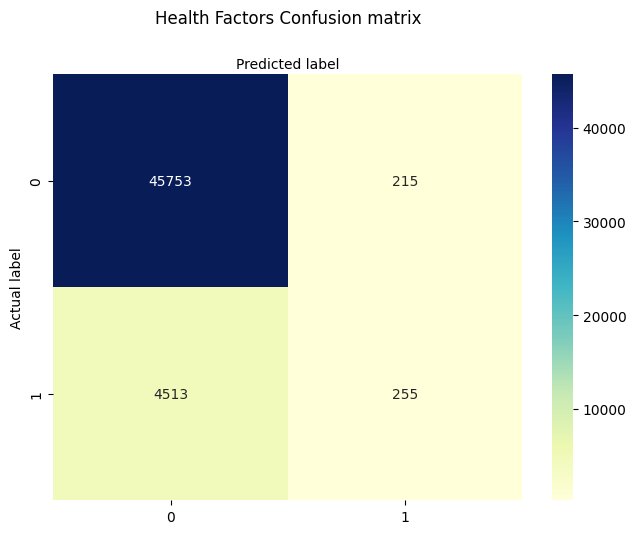

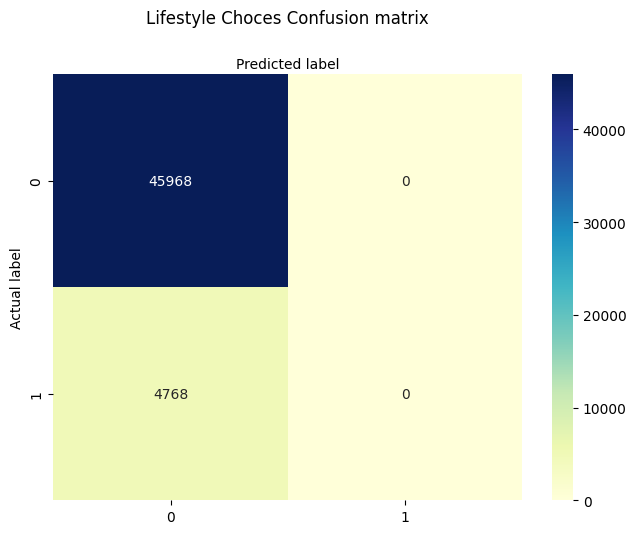

In [74]:
# Creating visual confusion matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# creating heatmap
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Health Factors Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Creating visual confusion matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# creating heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Lifestyle Choces Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')